# Random forest
Assignment

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [1]:
# Import the data
import pandas as pd

In [2]:
df = pd.read_csv("D:/Shiva Data Science/ExcelR Assignments/Decision Trees/Fraud_check.csv", encoding='latin1')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# Convert the taxable_income <= 30000 as "Risky" and others are "Good".
df['Taxable.Income'] = ['Good' if value > 30000
                        else 'Risky' for value in df['Taxable.Income']]
df['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [6]:
# Data transformation
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [7]:
Columns_to_encode = ["Undergrad","Marital.Status","Urban","Taxable.Income"]
for columns in Columns_to_encode:
    df[columns] = LE.fit_transform(df[columns])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [8]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
# Split independent and dependent variables
X = df[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
Y = df["Taxable.Income"]

In [10]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [11]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [12]:
import numpy as np
np.unique(Y)

array([0, 1])

In [13]:
Y.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [14]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [15]:
#EDA

df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


In [16]:
# Split the data to training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [18]:
# Model fitting

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [19]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
# Predict the model
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)


In [21]:
# Model evulation

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Accuracy score for Training data: ", ac1.round(3))
print("Accuracy score for Test data: ", ac2.round(3))

Accuracy score for Training data:  0.79
Accuracy score for Test data:  0.817


# RANDOM FOREST Model

In [22]:
# RANDOM FOREST Model
#------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)
Y_pred_train = RFC.predict(X_train)
Y_pred_test = RFC.predict(X_test)

# Model evulation

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Accuracy score for Training data: ", ac1.round(3))
print("Accuracy score for Test data: ", ac2.round(3))

Accuracy score for Training data:  0.944
Accuracy score for Test data:  0.792


[Text(0.5, 0.875, 'x[3] <= 24.5\nentropy = 0.75\nsamples = 480\nvalue = [377, 103]'),
 Text(0.3, 0.625, 'x[2] <= 197925.0\nentropy = 0.778\nsamples = 374\nvalue = [288, 86]'),
 Text(0.2, 0.375, 'x[3] <= 17.5\nentropy = 0.771\nsamples = 372\nvalue = [288, 84]'),
 Text(0.1, 0.125, 'entropy = 0.723\nsamples = 279\nvalue = [223, 56]'),
 Text(0.3, 0.125, 'entropy = 0.883\nsamples = 93\nvalue = [65, 28]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.625, 'x[3] <= 25.5\nentropy = 0.635\nsamples = 106\nvalue = [89, 17]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.8, 0.375, 'x[2] <= 44828.0\nentropy = 0.695\nsamples = 91\nvalue = [74, 17]'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.9, 0.125, 'entropy = 0.746\nsamples = 80\nvalue = [63, 17]')]

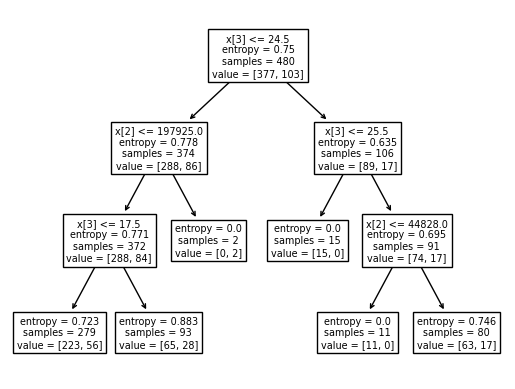

In [23]:
from sklearn import tree
tree.plot_tree(DTC)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

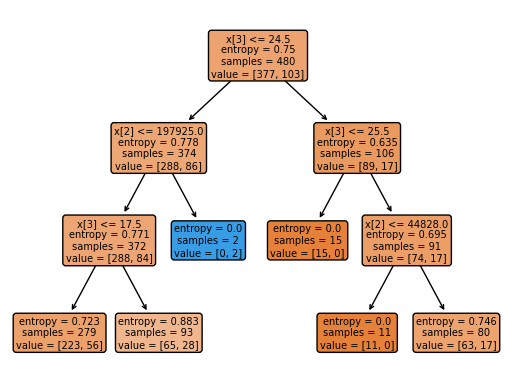

In [24]:
from sklearn import tree
import graphviz

Data = tree.plot_tree(DTC,filled=True,rounded= True)
Graph = graphviz.Source(Data)
Graph